# World Happiness Report Data Cleaning and EDA

#### By Njeri Macharia

## Data Cleaning & Preparation

### 1. Data Ingestion

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly.express as px
import country_converter as coco
import glob

# plot styling
sns.set(style = 'whitegrid')
pd.options.display.max_columns = 50

In [2]:
# reading in all dfs separately for inspection

df_2015 = pd.read_csv("WHR/2015.csv")
df_2016 = pd.read_csv("WHR/2016.csv")
df_2017 = pd.read_csv("WHR/2017.csv")
df_2018 = pd.read_csv("WHR/2018.csv")
df_2019 = pd.read_csv("WHR/2019.csv")

In [3]:
# printing each years columns

for year, df in zip(
    [2015, 2016, 2017, 2018, 2019],
    [df_2015, df_2016, df_2017, df_2018, df_2019]
):
    print(f"\n{year} columns:")
    print(df.columns.tolist())


2015 columns:
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

2016 columns:
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

2017 columns:
['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']

2018 columns:
['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

2019 columns:
['Overall rank', 'Country or re

### 2. Column Standardization

In [4]:
rename_2015_2016 = {
    "Country": "country",
    "Happiness Score": "happiness_score",
    "Happiness Rank": "happiness_rank",
    "Economy (GDP per Capita)": "gdp_per_capita",
    "Family": "social_support",
    "Health (Life Expectancy)": "life_expectancy",
    "Freedom": "freedom",
    "Trust (Government Corruption)": "corruption",
    "Generosity": "generosity"
}

df_2015 = df_2015.rename(columns=rename_2015_2016)
df_2015["year"] = 2015

df_2016 = df_2016.rename(columns=rename_2015_2016)
df_2016["year"] = 2016

rename_2017 = {
    "Country": "country",
    "Happiness.Score": "happiness_score",
    "Happiness.Rank": "happiness_rank",
    "Economy..GDP.per.Capita.": "gdp_per_capita",
    "Family": "social_support",
    "Health..Life.Expectancy.": "life_expectancy",
    "Freedom": "freedom",
    "Trust..Government.Corruption.": "corruption",
    "Generosity": "generosity"
}

df_2017 = df_2017.rename(columns=rename_2017)
df_2017["year"] = 2017

rename_2018_2019 = {
    "Country or region": "country",
    "Score": "happiness_score",
    "Overall rank": "happiness_rank",
    "GDP per capita": "gdp_per_capita",
    "Social support": "social_support",
    "Healthy life expectancy": "life_expectancy",
    "Freedom to make life choices": "freedom",
    "Perceptions of corruption": "corruption",
    "Generosity": "generosity"
}

df_2018 = df_2018.rename(columns=rename_2018_2019)
df_2018["year"] = 2018

df_2019 = df_2019.rename(columns=rename_2018_2019)
df_2019["year"] = 2019


The dataset consisted of multiple yearly files with inconsistent schemas. I performed column inspection, schema alignment, and feature standardization before concatenating the datasets into a unified analytical table.

In [5]:
# final list of columns

new_columns = [
    "country",
    "happiness_score",
    "happiness_rank",
    "gdp_per_capita",
    "social_support",
    "life_expectancy",
    "freedom",
    "corruption",
    "generosity",
    "year"
]

dfs = [df_2015, df_2016, df_2017, df_2018, df_2019]
dfs = [df[new_columns] for df in dfs]

### 3. Dataset Merging

In [6]:
# concat and check

whr_df = pd.concat(dfs, ignore_index=True)
whr_df.head()

,country,happiness_score,happiness_rank,gdp_per_capita,social_support,life_expectancy,freedom,corruption,generosity,year
0,Switzerland,7.587,1,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,7.561,2,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,7.527,3,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,7.522,4,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,7.427,5,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [7]:
whr_df.tail()

,country,happiness_score,happiness_rank,gdp_per_capita,social_support,life_expectancy,freedom,corruption,generosity,year
777,Rwanda,3.334,152,0.359,0.711,0.614,0.555,0.411,0.217,2019
778,Tanzania,3.231,153,0.476,0.885,0.499,0.417,0.147,0.276,2019
779,Afghanistan,3.203,154,0.350,0.517,0.361,0.000,0.025,0.158,2019
780,Central African Republic,3.083,155,0.026,0.000,0.105,0.225,0.035,0.235,2019
781,South Sudan,2.853,156,0.306,0.575,0.295,0.010,0.091,0.202,2019


#### Quick Initial Inspection of Whole DF

In [8]:
whr_df.shape

(782, 10)

In [9]:
whr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          782 non-null    object 
 1   happiness_score  782 non-null    float64
 2   happiness_rank   782 non-null    int64  
 3   gdp_per_capita   782 non-null    float64
 4   social_support   782 non-null    float64
 5   life_expectancy  782 non-null    float64
 6   freedom          782 non-null    float64
 7   corruption       781 non-null    float64
 8   generosity       782 non-null    float64
 9   year             782 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 61.2+ KB


In [10]:
whr_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,782,170,Switzerland,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
happiness_score,782.0,NaN,NaN,NaN,5.379018,1.127456,2.693,4.50975,5.322,6.1895,7.769
happiness_rank,782.0,NaN,NaN,NaN,78.69821,45.182384,1.0,40.0,79.0,118.0,158.0
gdp_per_capita,782.0,NaN,NaN,NaN,0.916047,0.40734,0.0,0.6065,0.982205,1.236187,2.096
social_support,782.0,NaN,NaN,NaN,1.078392,0.329548,0.0,0.869363,1.124735,1.32725,1.644
life_expectancy,782.0,NaN,NaN,NaN,0.612416,0.248309,0.0,0.440183,0.64731,0.808,1.141
freedom,782.0,NaN,NaN,NaN,0.411091,0.15288,0.0,0.309768,0.431,0.531,0.724
corruption,781.0,NaN,NaN,NaN,0.125436,0.105816,0.0,0.054,0.091,0.15603,0.55191
generosity,782.0,NaN,NaN,NaN,0.218576,0.122321,0.0,0.13,0.201982,0.278832,0.838075
year,782.0,NaN,NaN,NaN,2016.993606,1.417364,2015.0,2016.0,2017.0,2018.0,2019.0


### 4. Handling Missing Values

In [11]:
missing = whr_df.isna().sum().sort_values(ascending = False)
missing[missing > 0]

corruption    1
dtype: int64

In [12]:
whr_df[whr_df['corruption'].isna()]

,country,happiness_score,happiness_rank,gdp_per_capita,social_support,life_expectancy,freedom,corruption,generosity,year
489,United Arab Emirates,6.774,20,2.096,0.776,0.67,0.284,NaN,0.186,2018


In [13]:
# Impute UAE corruption average from other years

uae_avg_corruption = (
    whr_df.loc[
        (whr_df["country"] == "United Arab Emirates") &
        (whr_df["corruption"].notna()),
        "corruption"
    ]
    .mean()
)

whr_df.loc[
    (whr_df["country"] == "United Arab Emirates") &
    (whr_df["year"] == 2018),
    "corruption"
] = uae_avg_corruption

whr_df[whr_df["corruption"].isna()]

,country,happiness_score,happiness_rank,gdp_per_capita,social_support,life_expectancy,freedom,corruption,generosity,year


### 5. Adding Continent Feature

#### 1. Country Name Standardization (ISO3)

In [14]:

whr_df["iso3"] = coco.convert(
    names = whr_df["country"],
    to = "ISO3"
)

whr_df[["country", "iso3"]].drop_duplicates().head(10)

,country,iso3
0,Switzerland,CHE
1,Iceland,ISL
2,Denmark,DNK
3,Norway,NOR
4,Canada,CAN
5,Finland,FIN
6,Netherlands,NLD
7,Sweden,SWE
8,New Zealand,NZL
9,Australia,AUS


In [15]:
# check if all iso3 were found

whr_df[whr_df["iso3"] == "not found"]["country"].unique()

array([], dtype=object)

#### 2. Feature Engineering: Adding Regions (Continents)

In [16]:

whr_df["continent"] = coco.convert(
    names=whr_df["iso3"],
    to="continent"
)

whr_df["continent"] = whr_df["continent"].str.title()
whr_df[["country", "continent"]].drop_duplicates().head(10)

,country,continent
0,Switzerland,Europe
1,Iceland,Europe
2,Denmark,Europe
3,Norway,Europe
4,Canada,America
5,Finland,Europe
6,Netherlands,Europe
7,Sweden,Europe
8,New Zealand,Oceania
9,Australia,Oceania


In [17]:
# check continents

whr_df["continent"].value_counts()

Asia       230
Africa     221
Europe     200
America    121
Oceania     10
Name: continent, dtype: int64

In [18]:
whr_df.head()

,country,happiness_score,happiness_rank,gdp_per_capita,social_support,life_expectancy,freedom,corruption,generosity,year,iso3,continent
0,Switzerland,7.587,1,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,CHE,Europe
1,Iceland,7.561,2,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,ISL,Europe
2,Denmark,7.527,3,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,DNK,Europe
3,Norway,7.522,4,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,NOR,Europe
4,Canada,7.427,5,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,CAN,America


## EDA

### 1. Overall Happiness Trends

#### Top 10 happiest vs bottom 10 unhappiest countries (average score across years)

In [19]:
top10_happy = (
    whr_df.groupby("country")["happiness_score"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

bottom10_happy = (
    whr_df.groupby("country")["happiness_score"]
    .mean()
    .sort_values()
    .head(10)
)


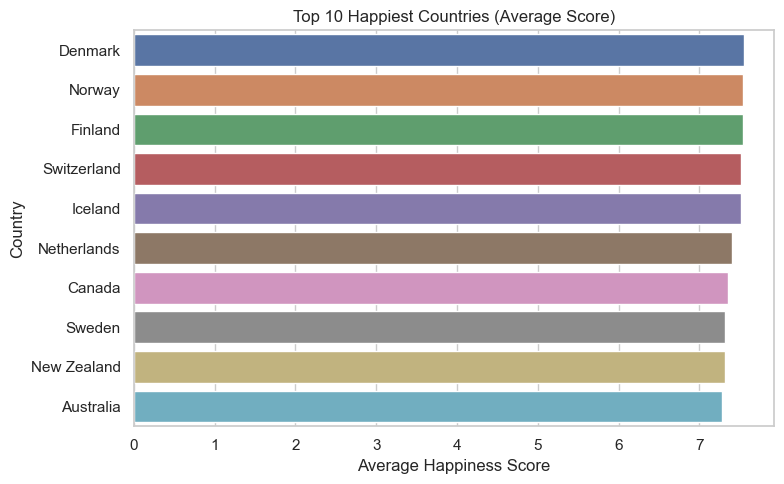

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=top10_happy.values, y=top10_happy.index)

plt.title("Top 10 Happiest Countries (Average Score)")
plt.xlabel("Average Happiness Score")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


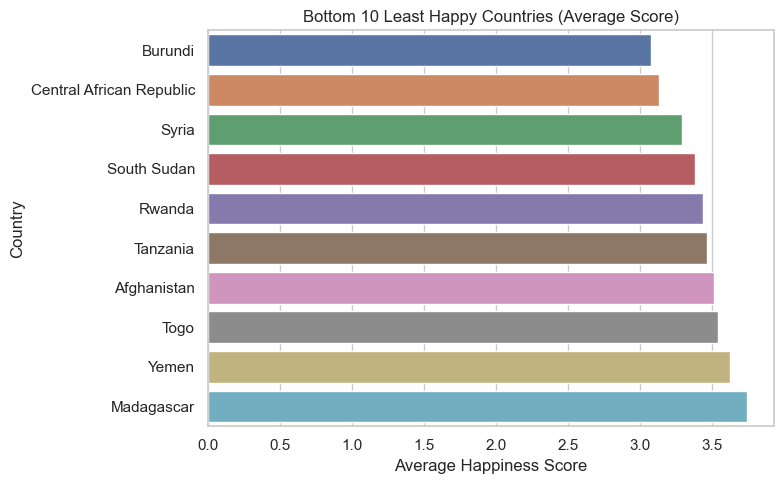

In [21]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=bottom10_happy.values,
    y=bottom10_happy.index
)

plt.title("Bottom 10 Least Happy Countries (Average Score)")
plt.xlabel("Average Happiness Score")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


#### Average global happiness score over time (by year)

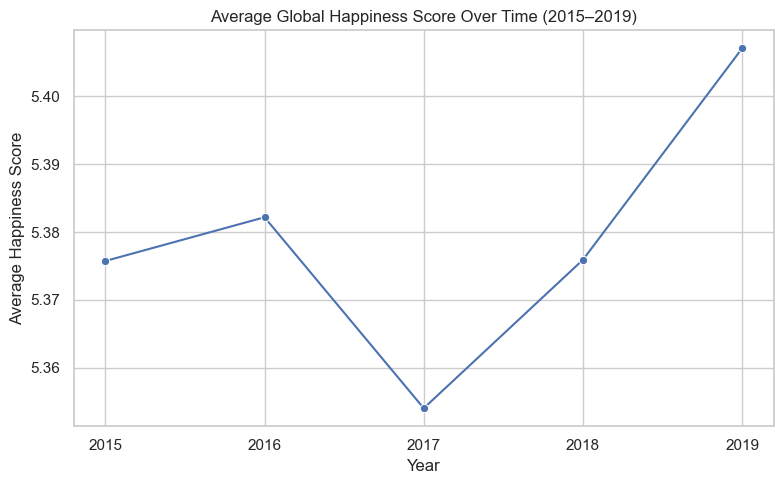

In [22]:
plt.figure(figsize=(8, 5))
avg_happiness = whr_df.groupby("year")["happiness_score"].mean().reset_index()

sns.lineplot(data=avg_happiness,x="year",y="happiness_score",marker="o")

plt.title("Average Global Happiness Score Over Time (2015–2019)")
plt.xlabel("Year")
plt.ylabel("Average Happiness Score")
plt.xticks(avg_happiness["year"].astype(int))
plt.tight_layout()
plt.show()

### Insights

#### Top 10 Happiest Countries (Average Scores)
The happiest countries are dominated by Nordic and high-income Western nations such as Denmark, Norway, Finland, Switzerland, and Iceland, all consistently scoring above 7.3 on the happiness scale.

#### Bottom 10 Least Happy Countries (Average Scores)
The least happy countries are primarily affected by conflict, political instability, poverty, and weak institutional support. Countries such as Burundi, Central African Republic, Syria, South Sudan, and Afghanistan record average happiness scores below 3.6, less than half of the scores observed in the happiest countries.

#### Average Global Happiness Score Over Time
The global average happiness score remains remarkably stable between 2015 and 2019, fluctuating within a narrow range of approximately 5.35 to 5.41.

- A slight increase is observed from 2015 (5.38) to 2016 (5.38).

- This is followed by a small dip in 2017 (5.35), suggesting a temporary decline in global well-being.

- Happiness levels recover in 2018 and reach their highest point in 2019 (5.41).

Overall, the absence of sharp increases or declines indicates that global happiness changes gradually over time, even though individual countries may experience significant year-to-year variation.

### 2. Feature Relationships

#### GDP per capita vs happiness score

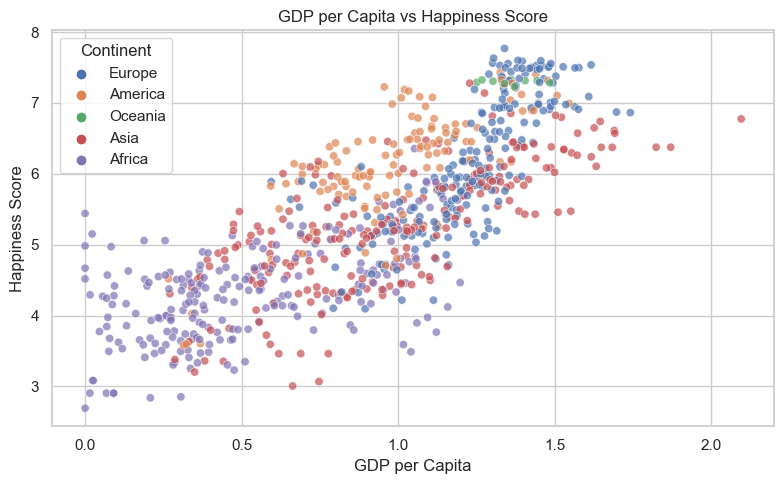

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=whr_df,
    x="gdp_per_capita",
    y="happiness_score",
    hue="continent",
    alpha=0.7
)

plt.title("GDP per Capita vs Happiness Score")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend(title="Continent")
plt.tight_layout()
plt.show()

#### Correlation between happiness score and key features

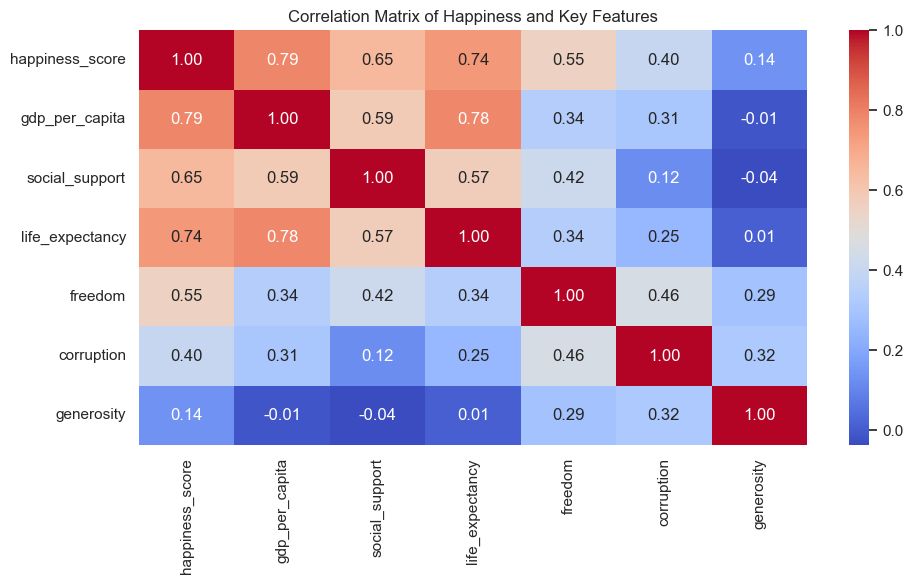

In [24]:
features = [
    "happiness_score",
    "gdp_per_capita",
    "social_support",
    "life_expectancy",
    "freedom",
    "corruption",
    "generosity"
]

corr_matrix = whr_df[features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Matrix of Happiness and Key Features")
plt.tight_layout()
plt.show()

### Insights

#### GDP per capita vs happiness score

The scatter plot shows a strong positive relationship between GDP per capita and happiness score across countries and regions. As GDP per capita increases, happiness scores generally rise, indicating that economic prosperity plays an important role in overall well-being.

Regional patterns can be described as follows:

- Europe and Oceania cluster toward the upper-right, combining higher GDP with higher happiness.

- Africa tends to cluster at lower GDP and lower happiness levels.

- Asia and the Americas show wider dispersion, highlighting differences in how economic wealth translates into perceived well-being.

#### Correlation between happiness score and key features

- GDP per capita (0.79) and life expectancy (0.74) show the strongest correlations with happiness, indicating that economic stability and health outcomes are critical contributors.

- Social support (0.65) also demonstrates a strong positive relationship, reinforcing the importance of community and social networks.

- Freedom (0.55) and perceptions of corruption (0.40) have moderate correlations, suggesting governance and personal autonomy influence happiness, though less strongly than economic and health factors.

- Generosity (0.14) shows a weak correlation, implying it contributes less directly to national happiness levels.

Overall, the results indicate that happiness is multidimensional, driven by a combination of economic, social, and institutional factors rather than income alone.

### 3. Regional Insights

#### Happiness score distribution by continent

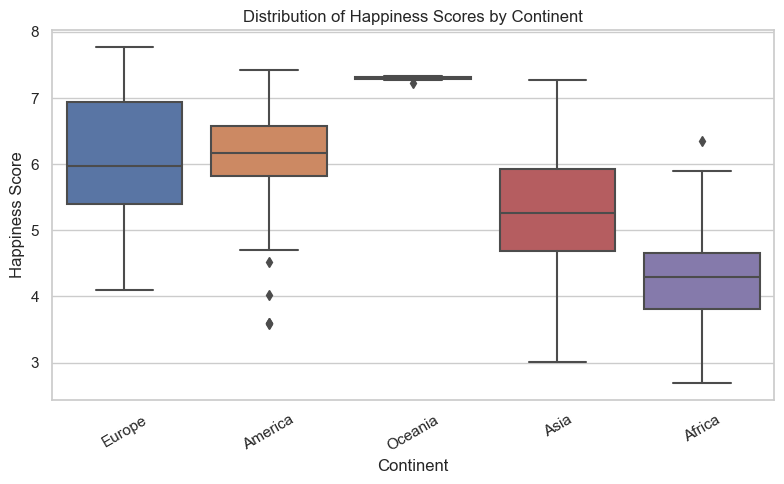

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(data=whr_df,x="continent",y="happiness_score")

plt.title("Distribution of Happiness Scores by Continent")
plt.xlabel("Continent")
plt.ylabel("Happiness Score")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#### Kenya vs neighboring countries

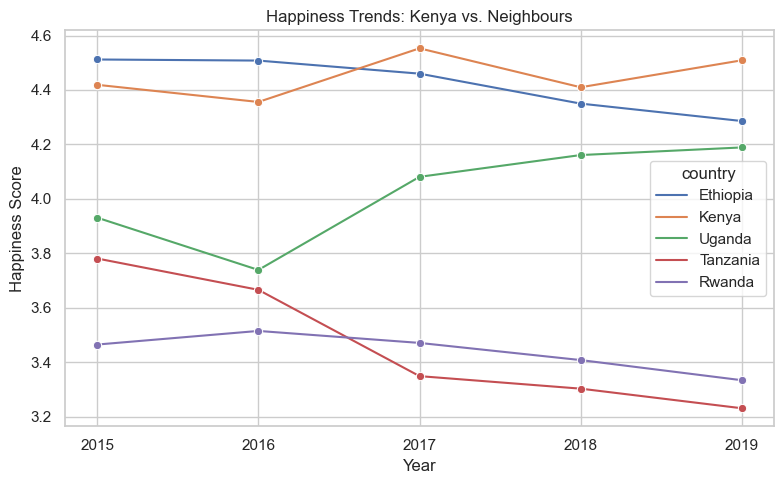

In [26]:
neighbours = ["Kenya", "Uganda", "Tanzania", "Rwanda", "Ethiopia"]

kenya_neighbours = whr_df[whr_df["country"].isin(neighbours)]

plt.figure(figsize=(8,5))
sns.lineplot(data=kenya_neighbours,x="year",y="happiness_score",hue="country",marker="o")

plt.title("Happiness Trends: Kenya vs. Neighbours")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.xticks(avg_happiness["year"].astype(int))
plt.tight_layout()
plt.show()

### Insights

#### Happiness score distribution by continent

The boxplot illustrates clear regional differences in happiness scores across continents. Overall, regions differ not only in average happiness levels but also in how evenly happiness is distributed across countries.

- Oceania shows the highest happiness scores with very little variation, indicating consistently high well-being across countries.

- Europe and the Americas follow with relatively high median scores, but wider spreads, suggesting greater variation in happiness between countries.

- Asia displays a broad distribution with a lower median, reflecting large disparities in happiness across countries at different development levels.

- Africa has the lowest median happiness scores and the widest spread, highlighting both lower overall happiness and significant inequality across countries

#### Kenya vs neighboring countries

- Kenya maintains a relatively stable happiness score, with a slight increase around 2017 followed by minor fluctuations.

- Uganda shows a gradual upward trend, indicating steady improvements in perceived well-being.

- Ethiopia experiences a slow but consistent decline in happiness across the period.

- Tanzania records a sharper drop after 2016, suggesting worsening conditions over time.

- Rwanda remains consistently low, with slight declines, indicating limited improvement during the period.

Overall, the results suggest that while Kenya and Uganda demonstrate relative stability or improvement, much of the region experienced declining or stagnant happiness levels during the period under study. The fact that three out of five countries show downward trends may point to region-wide challenges affecting well-being, such as economic pressures, governance issues, or social instability.

### 4. Outliers

#### GDP per capita vs happiness score

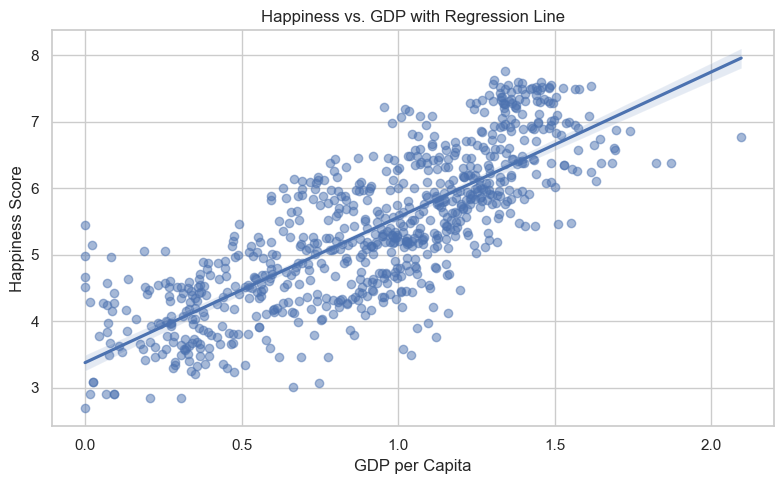

In [27]:
plt.figure(figsize=(8,5))
sns.regplot(data=whr_df,x="gdp_per_capita",y="happiness_score",scatter_kws={"alpha":0.5})

plt.title("Happiness vs. GDP with Regression Line")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.tight_layout()
plt.show()

### Insights

#### GDP per capita vs happiness score

We observe a strong positive relationship between GDP per capita and happiness score. Most countries cluster closely around the regression line, indicating that economic prosperity is a strong predictor of happiness. We however note some outliers such as countries with very low GDP per capita having relatively high happiness scores emphasizing that while income matters, other factors play a critical role in shaping perceived happiness.